In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings # Supress warnings 
import plotly.graph_objects as go
warnings.filterwarnings('ignore') 

In [2]:
validation_start_date = "2003-05-01"
test_start_date = "2011-05-01"

In [3]:
data = pd.read_csv('economics.csv', index_col="date", parse_dates=True)
data = data.drop(columns=["Unnamed: 0"])

In [4]:
y = pd.DataFrame(data["pce"])
X = data.drop(columns="pce")

In [5]:
def sin_cos_transform(series, divisor=-1):
    """
    Apply sin cos transformation to get cyclical features.

    Args:
        series (iterable): Series to transform
        divisor (int): Divisor value. If it doesn't set, function gets max value of series.

    Returns:
        - sin_values (list) - Sin transformed values
        - cos_values (list) - Cos transformed values
    """
    if divisor == -1:
        divisor = series.max()
    sin_values = [math.sin((2 * math.pi * x) / divisor) for x in list(series)]
    cos_values = [math.cos((2 * math.pi * x) / divisor) for x in list(series)]
    return sin_values, cos_values


In [6]:
X["pce_diff_1"] = y["pce"].shift(1).diff()
X['pce_lag1']= y.shift(1)

X["pop_log"] = np.log10(np.array(X["pop"]))
X['pop_lag1'] = X['pop'].shift(1)
X["pop_diff_1"] = X["pop"].shift(1).diff()
X["pop_diff_2"] = X["pop"].shift(2).diff(2)
X["pop_diff_3"] = X["pop"].shift(3).diff(3)
X["pop_diff_4"] = X["pop"].shift(4).diff(4)
X["pop_diff_5"] = X["pop"].shift(5).diff(5)

X['psavert_lag1'] = X['psavert'].shift(1)
X['psavert_lag2'] = X['psavert'].shift(2)
X['psavert_lag3'] = X['psavert'].shift(3)
X['psavert_lag4'] = X['psavert'].shift(4)
X['uempmed_lag_1'] = X['uempmed'].shift(1)
X['uempmed_lag12'] = X['uempmed'].shift(12)
X['uempmed_lag24'] = X['uempmed'].shift(24)

X['unemploy_lag_1'] = X['unemploy'].shift(1)
X['unemploy_lag_7'] = X['unemploy'].shift(7)


# time related
X["month_cos"], X["month_sin"] = sin_cos_transform(X.index.month, divisor=11)
X["quarter_cos"], X["quarter_sin"] = sin_cos_transform(X.index.quarter, divisor=11)
X["season_cos"], X["season_sin"] = sin_cos_transform(X.index.month % 12 // 3 + 1, divisor=11)





X

,pop,psavert,uempmed,unemploy,pce_diff_1,pce_lag1,pop_log,pop_lag1,pop_diff_1,pop_diff_2,...,uempmed_lag12,uempmed_lag24,unemploy_lag_1,unemploy_lag_7,month_cos,month_sin,quarter_cos,quarter_sin,season_cos,season_sin
date,,,,,,,,,,,,,,,,,,,,,
1967-07-01,198712.000,12.6,4.5,2944,NaN,NaN,5.298224,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-7.557496e-01,-0.654861,0.989821,-0.142315,0.989821,-0.142315
1967-08-01,198911.000,12.6,4.7,2945,NaN,506.7,5.298659,198712.000,NaN,NaN,...,NaN,NaN,2944.0,NaN,-9.898214e-01,-0.142315,0.989821,-0.142315,0.989821,-0.142315
1967-09-01,199113.000,11.9,4.6,2958,3.1,509.8,5.299100,198911.000,199.000,NaN,...,NaN,NaN,2945.0,NaN,-9.096320e-01,0.415415,0.989821,-0.142315,0.755750,-0.654861
1967-10-01,199311.000,12.9,4.9,3143,5.8,515.6,5.299531,199113.000,202.000,NaN,...,NaN,NaN,2958.0,NaN,-5.406408e-01,0.841254,0.755750,-0.654861,0.755750,-0.654861
1967-11-01,199498.000,12.8,4.7,3066,-3.4,512.2,5.299939,199311.000,198.000,401.000,...,NaN,NaN,3143.0,NaN,-1.133108e-15,1.000000,0.755750,-0.654861,0.755750,-0.654861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-01,319746.157,7.6,12.9,8717,28.4,12051.4,5.504805,319564.209,210.475,459.948,...,17.3,17.7,9090.0,9859.0,5.406408e-01,0.841254,0.755750,-0.654861,0.540641,0.841254
2015-01-01,319928.646,7.7,13.2,8903,10.6,12062.0,5.505053,319746.157,181.948,438.913,...,15.4,15.8,8717.0,9460.0,5.406408e-01,0.841254,0.540641,0.841254,0.540641,0.841254
2015-02-01,320074.511,7.9,12.9,8610,-16.0,12046.0,5.505251,319928.646,182.489,392.423,...,15.9,17.2,8903.0,9608.0,9.096320e-01,0.415415,0.540641,0.841254,0.540641,0.841254


In [7]:
sp = pd.read_csv("sp.csv", thousands=',', index_col="Date", parse_dates=True)
house = pd.read_csv("ASPUS.csv", index_col="DATE", parse_dates=True)
gdp = pd.read_csv("GDP.csv", index_col="DATE", parse_dates=True)
m2 = pd.read_csv("m2.csv", index_col="DATE", parse_dates=True)
cpi = pd.read_csv("cpi.csv",index_col='Yearmon', parse_dates=True, dayfirst=True)
exports = pd.read_csv("exports.csv",index_col='DATE', parse_dates=True)
recessions = pd.read_csv("recession.csv",index_col='DATE', parse_dates=True)
fedfunds = pd.read_csv("FEDFUNDS.csv",index_col='DATE', parse_dates=True)
X['sp500']=sp['Price']
X['house']=house['ASPUS']
X['m2']=m2['M2SL']
X['gdp']= gdp['GDP']
X['cpi'] = cpi['CPI']
X['exports'] = exports['NETEXP']
X['recessions'] = recessions['JHDUSRGDPBR']
X['fedfunds'] = fedfunds['FEDFUNDS']
X.fillna(method='bfill')

,pop,psavert,uempmed,unemploy,pce_diff_1,pce_lag1,pop_log,pop_lag1,pop_diff_1,pop_diff_2,...,season_cos,season_sin,sp500,house,m2,gdp,cpi,exports,recessions,fedfunds
date,,,,,,,,,,,,,,,,,,,,,
1967-07-01,198712.000,12.6,4.5,2944,3.1,506.7,5.298224,198712.000,199.000,401.000,...,0.989821,-0.142315,89.50,23900.0,506.3,865.233,33.400,3.302,0.0,3.79
1967-08-01,198911.000,12.6,4.7,2945,3.1,506.7,5.298659,198712.000,199.000,401.000,...,0.989821,-0.142315,89.50,24400.0,510.8,881.439,33.500,2.244,0.0,3.90
1967-09-01,199113.000,11.9,4.6,2958,3.1,509.8,5.299100,198911.000,199.000,401.000,...,0.755750,-0.654861,89.50,24400.0,514.7,881.439,33.600,2.244,0.0,3.99
1967-10-01,199311.000,12.9,4.9,3143,5.8,515.6,5.299531,199113.000,202.000,401.000,...,0.755750,-0.654861,89.50,24400.0,518.2,881.439,33.700,2.244,0.0,3.88
1967-11-01,199498.000,12.8,4.7,3066,-3.4,512.2,5.299939,199311.000,198.000,401.000,...,0.755750,-0.654861,89.50,25400.0,521.2,909.387,33.800,1.054,0.0,4.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-01,319746.157,7.6,12.9,8717,28.4,12051.4,5.504805,319564.209,210.475,459.948,...,0.540641,0.841254,2058.90,348000.0,11684.9,17991.348,234.812,-526.916,0.0,0.12
2015-01-01,319928.646,7.7,13.2,8903,10.6,12062.0,5.505053,319746.157,181.948,438.913,...,0.540641,0.841254,1994.99,348000.0,11745.6,17991.348,233.707,-526.916,0.0,0.11
2015-02-01,320074.511,7.9,12.9,8610,-16.0,12046.0,5.505251,319928.646,182.489,392.423,...,0.540641,0.841254,2104.50,339700.0,11879.0,18193.707,234.722,-508.803,0.0,0.11


In [8]:
X.fillna(method="bfill", inplace=True)
X_train = X[:test_start_date]
X_val = X[validation_start_date:test_start_date]
X_test = X[test_start_date:]

y_train = y[:test_start_date]
y_val = y[validation_start_date:test_start_date]
y_test = y[test_start_date:]
y_train.dropna(inplace=True)
X_train = X_train.loc[y_train.index]
X_train

,pop,psavert,uempmed,unemploy,pce_diff_1,pce_lag1,pop_log,pop_lag1,pop_diff_1,pop_diff_2,...,season_cos,season_sin,sp500,house,m2,gdp,cpi,exports,recessions,fedfunds
date,,,,,,,,,,,,,,,,,,,,,
1967-07-01,198712.000,12.6,4.5,2944,3.1,506.7,5.298224,198712.000,199.000,401.000,...,0.989821,-0.142315,89.50,23900.0,506.3,865.233,33.400,3.302,0.0,3.79
1967-08-01,198911.000,12.6,4.7,2945,3.1,506.7,5.298659,198712.000,199.000,401.000,...,0.989821,-0.142315,89.50,24400.0,510.8,881.439,33.500,2.244,0.0,3.90
1967-09-01,199113.000,11.9,4.6,2958,3.1,509.8,5.299100,198911.000,199.000,401.000,...,0.755750,-0.654861,89.50,24400.0,514.7,881.439,33.600,2.244,0.0,3.99
1967-10-01,199311.000,12.9,4.9,3143,5.8,515.6,5.299531,199113.000,202.000,401.000,...,0.755750,-0.654861,89.50,24400.0,518.2,881.439,33.700,2.244,0.0,3.88
1967-11-01,199498.000,12.8,4.7,3066,-3.4,512.2,5.299939,199311.000,198.000,401.000,...,0.755750,-0.654861,89.50,25400.0,521.2,909.387,33.800,1.054,0.0,4.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-01-01,310960.740,7.4,21.5,14013,37.4,10392.1,5.492706,310781.705,185.941,419.298,...,0.540641,0.841254,1286.12,268100.0,8823.1,15351.444,220.223,-568.476,0.0,0.17
2011-02-01,311113.376,7.6,21.1,13820,43.4,10435.5,5.492919,310960.740,179.035,381.747,...,0.540641,0.841254,1327.22,267600.0,8886.9,15557.535,221.309,-581.092,0.0,0.16
2011-03-01,311265.404,7.0,21.5,13737,34.6,10470.1,5.493131,311113.376,152.636,364.976,...,0.909632,0.415415,1325.83,267600.0,8943.5,15557.535,223.467,-581.092,0.0,0.14


In [9]:
y_val.dropna(inplace=True)
y_val

,pce
date,
2003-05-01,7628.1
2003-06-01,7678.6
2003-07-01,7738.2
2003-08-01,7834.5
2003-09-01,7835.0
...,...
2011-01-01,10435.5
2011-02-01,10470.1
2011-03-01,10550.5


In [10]:
exogenous_features = ['pop', 'psavert', 'uempmed', 'unemploy', 'pce_diff_1', 'pce_lag1',
       'pop_log', 'pop_lag1', 'pop_diff_1', 'pop_diff_2', 'pop_diff_3',
       'pop_diff_4', 'pop_diff_5', 'psavert_lag1', 'psavert_lag2',
       'psavert_lag3', 'psavert_lag4', 'uempmed_lag_1', 'uempmed_lag12',
       'uempmed_lag24', 'unemploy_lag_1', 'unemploy_lag_7', 'month_cos',
       'month_sin', 'quarter_cos', 'quarter_sin', 'season_cos', 'season_sin',
       'sp500', 'house', 'm2', 'gdp', 'cpi', 'exports', 'recessions',
       'fedfunds']

In [11]:
import pmdarima as pm
model = pm.auto_arima(y_train['pce'], exogenous=X_train[exogenous_features], trace=True, error_action="ignore", suppress_warnings=True)
model.fit(y_train['pce'], exogenous=X_train[exogenous_features])
forecast = model.predict(n_periods=len(y_test), exogenous=X_test[exogenous_features])
y_test["Forecast_ARIMAX"] = forecast

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=4845.339, Time=0.83 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=5242.278, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=5009.687, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=4853.027, Time=0.07 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=4843.189, Time=0.14 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=4843.009, Time=0.10 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=4841.383, Time=0.14 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=4833.841, Time=0.45 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=4836.012, Time=0.64 sec
 ARIMA(1,2,4)(0,0,0)[0]             : AIC=4835.757, Time=0.55 sec
 ARIMA(0,2,4)(0,0,0)[0]             : AIC=4839.142, Time=0.31 sec
 ARIMA(2,2,4)(0,0,0)[0]             : AIC=4837.838, Time=0.56 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.85 sec

Best model:  ARIMA(1,2,3)(0,0,0)[0]          
Total fit time: 5.356 seconds


<Axes: xlabel='date'>

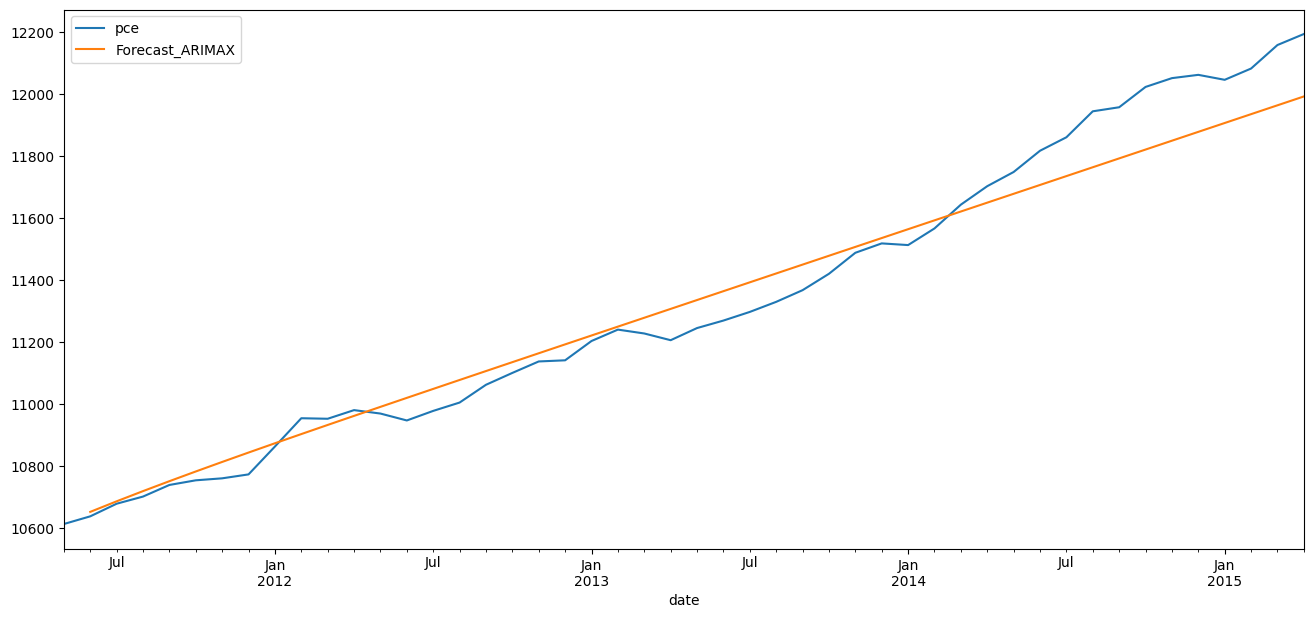

In [12]:
y_test[["pce", "Forecast_ARIMAX"]].plot(figsize=(16, 7))

In [13]:
y_test['Forecast_ARIMAX'].bfill(inplace=True)

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

rmse = np.sqrt(mean_squared_error(y_test['pce'], y_test['Forecast_ARIMAX']))
print("RMSE of Auto ARIMAX:", rmse)
print("MAE of Auto ARIMAX:", mean_absolute_error(y_test['pce'], y_test['Forecast_ARIMAX']))

RMSE of Auto ARIMAX: 94.67562799478306
MAE of Auto ARIMAX: 73.81004663252081
